# Week 4 Exercise

**build a linear regression model to predict fuel efficiency (miles per gallon) of automobiles. Download the auto-mpg.csv dataset from: Auto-mpg dataset.**

<br>1. Load the data as a Pandas data frame and ensure that it imported correctly.
<br>2. Begin by prepping the data for modeling:
    <br>&emsp;&emsp;Remove the car name column.
    <br>&emsp;&emsp;The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.
    <br>&emsp;&emsp;Create dummy variables for the origin column.
<br>3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?
<br>4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.
<br>5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.
<br>6. Train an ordinary linear regression on the training data.
<br>7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.
<br>8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

###### 0. Loading necessary modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

###### 1. Load the data as a Pandas data frame and ensure that it imported correctly. 

In [2]:
data = pd.read_csv('auto-mpg.csv')

In [3]:
print(data.head())
print(data.index)
print(data.columns)
print(data.dtypes)

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
RangeIndex(start=0, stop=398, step=1)
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
mpg             float64
cylinders         int64
displacement    float64
horsepower       obj

**Data Description:**

Number of columns: 9 

column names:

mpg: continuous
<br>cylinders: multi-valued discrete
<br>displacement: continuous
<br>horsepower: continuous
<br>weight: continuous
<br>acceleration: continuous
<br>model year: multi-valued discrete
<br>origin: multi-valued discrete
<br>car name: string (unique for each instance)

###### 2. Begin by prepping the data for modeling: 

###### 2.a Remove the car name column. 

In [4]:
data = data.drop(columns=['car name'])

###### 2.b The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.

In [5]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [6]:
data.loc[data['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


There are total 6 rows with horespower as '?', which is causing horsepower to be loaded as String data type

In [7]:
data.loc[data['horsepower'] != '?'].astype('float').describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Mean for the horspower column is 104.469388 so rounding down to 104.5

In [8]:
data['horsepower'].loc[(data['horsepower'] == '?')] = 104.5

In [9]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', 104.5, '100', '105', '175', '153', '180',
       '110', '72', '86', '70', '76', '65', '69', '60', '80', '54', '208',
       '155', '112', '92', '145', '137', '158', '167', '94', '107', '230',
       '49', '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Value with ? has been replaced by mean value of 104.5

In [10]:
data.horsepower = data.horsepower.astype('float')
print(data.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object


Setting horspower to float type column

###### 2c. Create dummy variables for the origin column. 

Dummy variables for Origin column has been created with origin_1,origin_2 & origin_3

based on the review of data, origin values seems 1 is a car made in USA, 2 in Europe and 3 in asia or other part of the world

In [11]:
data['origin_code'] = data['origin'].replace([1,2,3],['USA','Europe','Asia'])

In [12]:
data_cleaned = pd.get_dummies(data, columns=['origin_code'])

In [13]:
data_cleaned['origin_code'] = data['origin_code']
data_cleaned.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_code_Asia,origin_code_Europe,origin_code_USA,origin_code
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0,1,USA
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0,1,USA
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0,1,USA
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0,1,USA
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0,1,USA


###### 3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg? 

Correlation Matrix:
                         mpg  cylinders  displacement  horsepower    weight  \
mpg                 1.000000  -0.775396     -0.804203   -0.771430 -0.831741   
cylinders          -0.775396   1.000000      0.950721    0.838931  0.896017   
displacement       -0.804203   0.950721      1.000000    0.893639  0.932824   
horsepower         -0.771430   0.838931      0.893639    1.000000  0.860568   
weight             -0.831741   0.896017      0.932824    0.860568  1.000000   
acceleration        0.420289  -0.505419     -0.543684   -0.684251 -0.417457   
model year          0.579267  -0.348746     -0.370164   -0.411644 -0.306564   
origin              0.563450  -0.562543     -0.609409   -0.453673 -0.581024   
origin_code_Asia    0.442174  -0.396479     -0.433505   -0.321331 -0.440817   
origin_code_Europe  0.259022  -0.352861     -0.373886   -0.281253 -0.298843   
origin_code_USA    -0.568192   0.604351      0.651407    0.486084  0.598398   

                    acceleratio

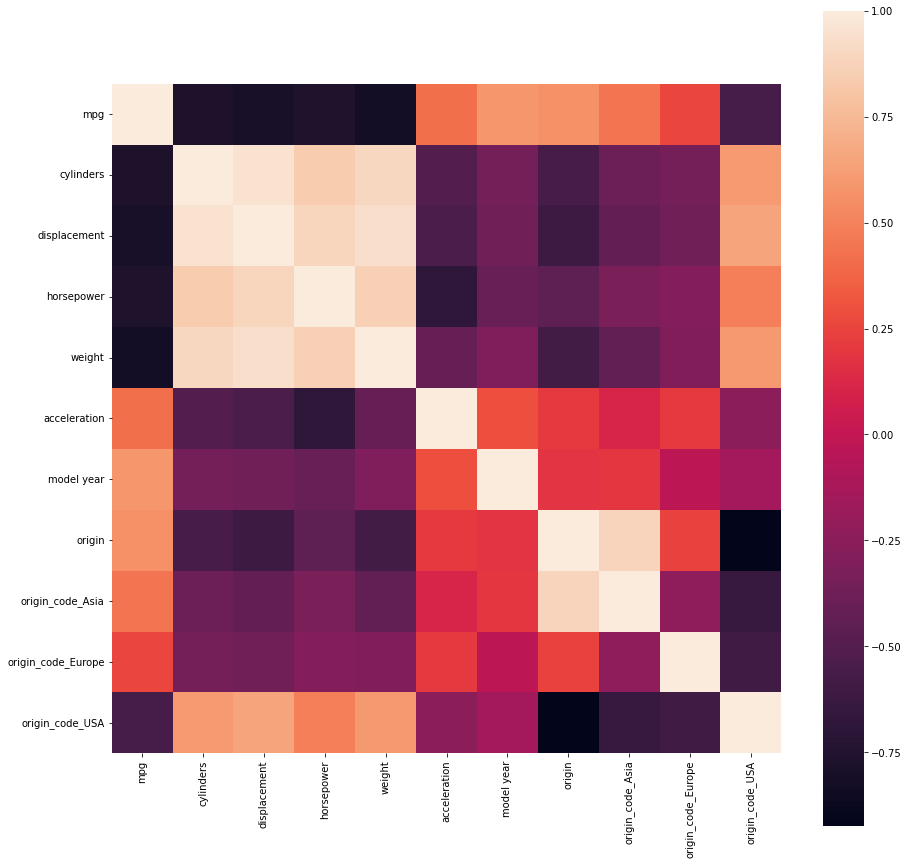

In [14]:
corrmat = data_cleaned.corr()
f, ax = plt.subplots(figsize=(15, 15))
print("Correlation Matrix:")
print(corrmat)
print("\n\n\n\nCorrelation Heat Map:")
sns.heatmap(corrmat, square=True);

number of Cylinders, displacement capacity, horspower,weight of the vehicle and cars manufactured in US (origin 1)has strong negative correlation with mpg

accelaration and cars manufactured in Europe (Origin 2) have some positive correlation with mpg

model of the year and cars manufacured in Asia or other parts (origin 3) have decent positive correlation with mpg

###### 4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

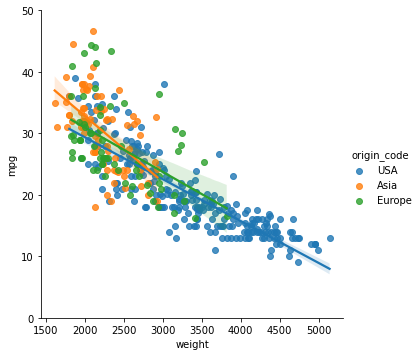

In [15]:
var = 'weight'
plot = sns.lmplot(var,'mpg',data=data_cleaned,hue='origin_code')
plot.set(ylim = (0,50))

Scatter plot distribution shows that the story in general aligns with correlation coefficient. Higher the weight lower the mpg.

few interesting observations that - except for few outliers wieght has strong negative correalation with mpg
<br> Significant number of the american/USA made cars are heavey and are lower in mpg
<br> most of the Asian and European made cars are lighter in weight, thus have higher mpg

In general Asian made cars are lighter and outperperform their European and US/American counterparts interms of mpg

###### 5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [16]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [17]:
#Select Predictor columns
X = data_cleaned[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', "origin"]]

#Select target column
y = data_cleaned['mpg']

names = [
       'mpg'
    ,  'cylinders'
    ,  'displacement'
    ,  'horsepower'
    ,  'weight'
    ,  'acceleration'
    ,  'model year'
    ,  'origin'
]

In [18]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

###### 6.Train an ordinary linear regression on the training data.

In [19]:
#Train a simple linear regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

#Print coefficients
list(zip(names[1:8], regr.coef_))

[('cylinders', -0.266507052336949),
 ('displacement', 0.016609722516447226),
 ('horsepower', -0.013493485335503003),
 ('weight', -0.006606192794354887),
 ('acceleration', 0.10455263000997611),
 ('model year', 0.7735828469488533),
 ('origin', 1.5254582759149211)]

###### 7.Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [20]:
#model evaluation
#Mean Squared error and R-squared on the training set
preds = regr.predict(X_train)
mse = metrics.mean_squared_error(y_train, preds)
rmse = np.sqrt(mean_squared_error(y_train,preds))
mae = metrics.mean_absolute_error(y_train, preds)

print("\n Mean Squared Error: %.4f \n RMSE: %.4f \n Mean Absolute Error: %.4f" % (mse,rmse,mae))


 Mean Squared Error: 11.2290 
 RMSE: 3.3510 
 Mean Absolute Error: 2.5561


In [21]:
#Test model on held out test set
#Mean Squared error on the testing set
preds_ = regr.predict(X_test)
mse_ = metrics.mean_squared_error(y_test, preds_)
rmse_ = np.sqrt(mean_squared_error(y_test,preds_))
mae_ = metrics.mean_absolute_error(y_test, preds_)

print("\n Mean Squared Error: %.4f \n RMSE: %.4f \n Mean Absolute Error: %.4f" % (mse_,rmse_,mae_))


 Mean Squared Error: 9.8313 
 RMSE: 3.1355 
 Mean Absolute Error: 2.4015


Populating the interactive namespace from numpy and matplotlib


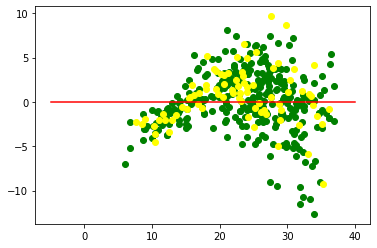

In [22]:
# Diagnostic Plot (errors vs. predicted)
%pylab inline
#Predicted vs. errors plot -> demonstrates an issue with this fit (high bias)
plt.scatter(regr.predict(X_train), regr.predict(X_train)-y_train, color = "green")
plt.plot([-5,40],[0,0], color = "red")

#place testing data on the plot as well
plt.scatter(regr.predict(X_test), regr.predict(X_test)-y_test, color = "yellow")

All MSE, MAE and RMSE values are higher.
<br>Which is an indication that the model prediction accuracy is not very high.

Same is represented in the Plot above the graph the variation in prediction in both Train and Test data sets.
<br> there seems to be an inherent high bias generated in linear regression causing errors in prediction

###### 8.Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [23]:
#Importing random forest regression
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf_reg = RandomForestRegressor().fit(X_train, y_train)

preds_rf_train = rf_reg.predict(X_train)

mse_rf_train = metrics.mean_squared_error(y_train, preds_rf_train)
rmse_rf_train = np.sqrt(mean_squared_error(y_train,preds_rf_train))
mae_rf_train = metrics.mean_absolute_error(y_train, preds_rf_train)
print("\n Train: \n Mean Squared Error: %.4f \n RMSE: %.4f \n Mean Absolute Error: %.4f" % (mse_rf_train,rmse_rf_train,mae_rf_train))


preds_rf_test = rf_reg.predict(X_test)

mse_rf_test = metrics.mean_squared_error(y_test, preds_rf_test)
rmse_rf_test = np.sqrt(mean_squared_error(y_test,preds_rf_test))
mae_rf_test = metrics.mean_absolute_error(y_test, preds_rf_test)

print("\n Test: \n Mean Squared Error: %.4f \n RMSE: %.4f \n Mean Absolute Error: %.4f" % (mse_rf_test,rmse_rf_test,mae_rf_test))


 Train: 
 Mean Squared Error: 1.0909 
 RMSE: 1.0445 
 Mean Absolute Error: 0.7177

 Test: 
 Mean Squared Error: 5.6100 
 RMSE: 2.3685 
 Mean Absolute Error: 1.6553


Populating the interactive namespace from numpy and matplotlib


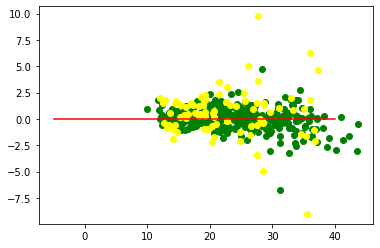

In [27]:
# Diagnostic Plot (errors vs. predicted)
%pylab inline
#Predicted vs. errors plot -> demonstrates an issue with this fit (high bias)
plt.scatter(rf_reg.predict(X_train), rf_reg.predict(X_train)-y_train, color = "green")
plt.plot([-5,40],[0,0], color = "red")

#place testing data on the plot as well
plt.scatter(rf_reg.predict(X_test), rf_reg.predict(X_test)-y_test, color = "yellow")

MSE,RMSE and MAE are lower for Random forst are lower in comparision to Liner regression for Train data.
<br> however test data seems to perform worse than train data. This could have been a result of overfitting during training,

As indicated by the graph as well, the randomforst predicts with higher accuracy in comparision to Linear regression atleast on train data. However model on the test data seems to be perfoming almost similarly. 